In [68]:
import pathlib
import pandas as pd
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt

In [69]:
file = pathlib.Path(".") / "submission.csv"
df = pd.read_csv(file)
df

,Id,Predicted
0,a,5041 208 11371 208 17701 208 24031 208 30361 2...
1,b,1091 2816 5171 547 7421 2816 11501 547 13751 2...


In [70]:
img = PIL.Image.open(pathlib.Path(".") / "test" / "a" / "mask.png")
img.size

(6330, 2727)

In [71]:
out_img = np.zeros((img.size[1], img.size[0], 1), dtype=np.uint8)
predicted = df["Predicted"].loc[0]
predicted = list(map(int, predicted.split(" ")))
starts = []
for i in range(0, len(predicted), 2):
    starts.append(i)
    start = predicted[i]
    count = predicted[i + 1]
    x1 = start % img.size[0]
    y1 = start // img.size[0]
    for i in range(count):
        assert out_img[y1, x1, 0] == 0
        out_img[y1, x1, 0] = 255
        x1 += 1
        if x1 >= img.size[0]:
            x1 %= img.size[0]
            y1 += 1

assert starts == sorted(starts)

out_img.shape, np.min(out_img), np.max(out_img)

((2727, 6330, 1), 0, 255)

In [72]:
2727 * 6330

17261910

In [73]:
out_img[:, :, 0].shape

(2727, 6330)

In [74]:
np.where(out_img[:, :, 0] > 0)

(array([   0,    0,    0, ..., 2715, 2715, 2715]),
 array([5041, 5042, 5043, ..., 6151, 6152, 6153]))

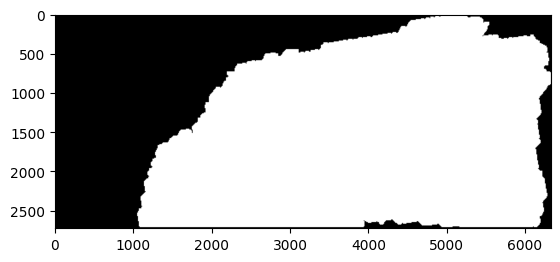

In [75]:
plt.imshow(out_img[:, :, 0], cmap="gray")